# Reward Dependent Corticostriatal Connectivity a Meta analysis

## Import Libraries from nimare (mostly)

In [1]:
from nimare.io import convert_sleuth_to_dataset
from nimare.utils import get_resource_path
import os

import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map
from nilearn import plotting

from nimare.correct import FWECorrector
from nimare.meta.cbma import ALE

ale = ALE(null_method="approximate")
corr = FWECorrector(method="montecarlo", voxel_thresh=0.01, n_iters=100, n_cores=4)


ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


## Characterize Meta Seeds

In [2]:
STR_seed_file="NIMARE_OUTPUT/Str_seed.txt"
STR_seed_dset=convert_sleuth_to_dataset(STR_seed_file)

PFC_seed_file="NIMARE_OUTPUT/PFC_Seed.txt"
PFC_seed_dset=convert_sleuth_to_dataset(PFC_seed_file)


STR_seed = ale.fit(STR_seed_dset)
PFC_seed = ale.fit(PFC_seed_dset)


STR_seed_corr = corr.transform(STR_seed)
PFC_seed_corr = corr.transform(PFC_seed)




INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


## Number of clusters and Center Of Mass for each seed

,1
Cluster ID,
Center of Mass,"(-1, 12, -4)"
"Liu ,2018-VS- Consumption",0.0486201
"Reference= MNI (from TAL) Kim ,2018-VS- Learning",0.0567185
"Reference= MNI (from Tal) Holst ,2014-VS- Consumption",0.0620958
"Reference= MNI Bolstad ,2013-L_VS- anticipation",0.0293359
"Reference= MNI Bossong ,2018-VS-anticipation",0.0292867
"Reference= MNI Camara ,2008-Nacc-consumption",0.0277419
"Reference= MNI Cao ,2019-VS- anticipation learn",0.0468544
"Reference= MNI Chan ,2018-VS- anticipation Nacc",0.0231038


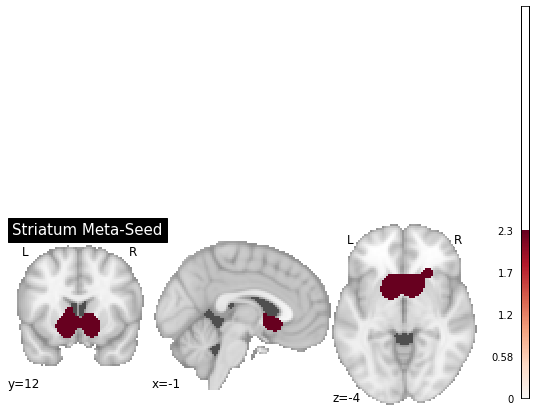

,1
Cluster ID,
Center of Mass,"(1, 40, -6)"
Kim- 2018-mpfc- Learning,0
Reference= MNI Behan- 2015-LIFG- ant+cons,0
Reference= MNI Cao- 2019-vmpfc- consumption,0.105318
Reference= MNI Deikof- 2012-vmpfc- learning,0.066712
Reference= MNI Dore- 2016-vmpfc- consumption,0.0780359
Reference= MNI Erdeniz- 2019-vmpfc-dlpfc- learning,0.0629336
Reference= MNI Geurts;vmPFC-valuation-,0.0706769
Reference= MNI Leong- 2018-vmpfc- Learning,0.06591


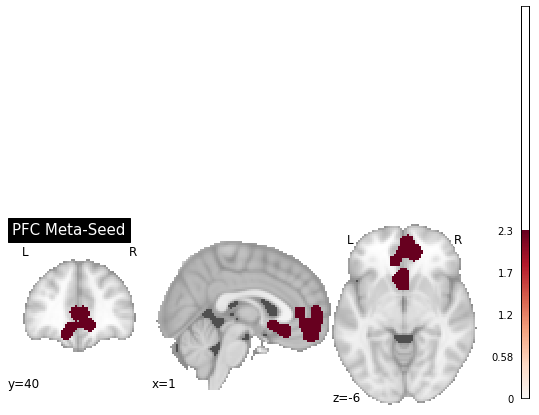

In [3]:
from nimare.diagnostics import Jackknife

jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
related_jackknife_table, _ = jackknife.transform(STR_seed_corr)
display(related_jackknife_table)

STR_img = STR_seed_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(STR_img,title="Striatum Meta-Seed",cmap="RdBu_r",draw_cross=False)

plt.show()

related_jackknife_table, _ = jackknife.transform(PFC_seed_corr)
display(related_jackknife_table)

PFC_img = PFC_seed_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(PFC_img,title="PFC Meta-Seed",cmap="RdBu_r",draw_cross=False)
plt.show()

## Subtraction of the seed regions

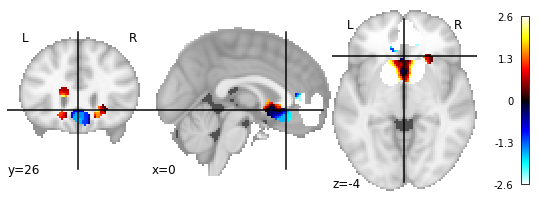

In [4]:
from nimare.meta.cbma import ALESubtraction
#https://neurostars.org/t/sanity-check-nimare-analysis-ale/17828/16
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(STR_seed_dset, PFC_seed_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =STR_img
img2 = PFC_img

# Threshold and binarize the ALE maps
from nilearn import image
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)

plot_stat_map(img_sub)
plt.show()

## Characterize Reward-Dependent Targets
### Striatum vs PFC targets
### Fitting the ALE and Correcting for multiple comparisons

In [5]:
STR_t_file="NIMARE_OUTPUT/Str_Target_noT.txt"
STR_t_dset=convert_sleuth_to_dataset(STR_t_file)

PFC_t_file="NIMARE_OUTPUT/PFC_target.txt"
PFC_t_dset=convert_sleuth_to_dataset(PFC_t_file)


STR_t = ale.fit(STR_t_dset)
PFC_t = ale.fit(PFC_t_dset)


STR_t_corr = corr.transform(STR_t)
PFC_t_corr = corr.transform(PFC_t)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


## Characterize Results from PFC and STR targets
### Number of clusters and relative contribution of different studies

,1,2,3,4,5,6,7
Cluster ID,,,,,,,
Center of Mass,"(2, -16, -4)","(2, 34, 28)","(-17, 51, 1)","(-10, -17, 7)","(-17, 9, 1)","(-24, -55, 53)","(-51, -1, 36)"
Cubillo 2019 Anticipation t-value-,6.64558e-06,0,0.110027,0.00975781,9.98466e-06,0.0115981,0.168032
Reference= MNI Bolstad 2013-L_VS- anticipation,0,0,0.000312942,0,0,0,0
Reference= MNI Bossong 2018-VS-anticipation tscore,5.45319e-05,0,0,0.000499536,0,0,0
Reference= MNI Cao 2019-VS- anticipation tscore,0.345104,1.2644e-10,0.252637,0.221874,0.330621,0.196051,0.309677
Reference= MNI Cao 2019-VS- learning tscore,0.245904,0,0.121114,0.308525,0.209697,0.175948,0.147446
Reference= MNI Chan 2018-VS- anticipation tstat,0.196161,0,0.0966287,0.00207155,0,0,0
Reference= MNI Chan 2018-VS- consumption tstat,0.000862055,0.16103,0,0,0,0,0
Reference= MNI Chan 2018; Nacc-anticipation tstat-,0.197664,0,0.0974473,0.00201713,0,0,0


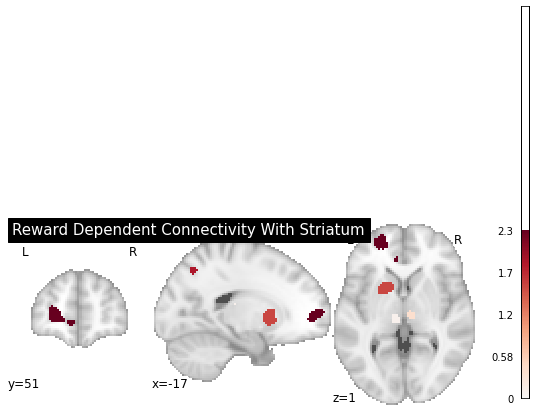

,1,2
Cluster ID,,
Center of Mass,"(29, 13, 6)","(8, 8, -4)"
Kim_ 2018-VS- Learning_z statistic,7.24027e-08,8.00826e-07
Reference= MNI Behan_ 2015-LIFG- ant,5.34202e-05,6.14034e-05
Reference= MNI Behan_ 2015-LIFG- cons,1.1991e-07,0.0026018
Reference= MNI Cao_ 2019-Vmpfc- consumption_tscore,0.333587,0.0281087
Reference= MNI Deikof_ 2012-vmpfc- learning_tscore,3.2861e-05,0.157839
Reference= MNI Dore_ 2016-vmpfc- consumption,0,0
Reference= MNI Enax_ 2015-vmpfc_ ACC; Valuation,0,0
Reference= MNI Erdeniz_ 2019-vmpfc_dlpfc- learning_ tscore,0.241927,0.230935


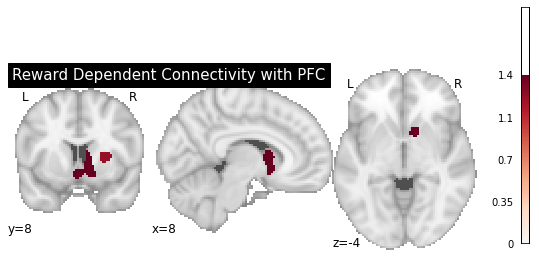

In [7]:
from nimare.diagnostics import Jackknife

jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
related_jackknife_table, _ = jackknife.transform(STR_t_corr)
display(related_jackknife_table)

STR_img = STR_t_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(STR_img,title="Reward Dependent Connectivity With Striatum",cmap="RdBu_r",draw_cross=False)

plt.show()

related_jackknife_table, _ = jackknife.transform(PFC_t_corr)
display(related_jackknife_table)

PFC_img = PFC_t_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(PFC_img,title="Reward Dependent Connectivity with PFC",cmap="RdBu_r",draw_cross=False)
plt.show()

# Subtraction analysis: Interactive Plot

In [8]:
from nimare.meta.cbma import ALESubtraction
#Recommended way to perform subtraction see link below
#https://neurostars.org/t/sanity-check-nimare-analysis-ale/17828/16
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(STR_t_dset, PFC_t_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =STR_img
img2 = PFC_img

# Threshold and binarize the ALE maps
from nilearn import image
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)


# Results
1. The Striatum and PFC show differential RDC with the vmPFC (Striatum Greater)
2. Striatum and PFC do not converge on regions with similar RDC. (Striatum does highlight DS)

In [ ]:
img_sub.to_filename("Targets_STR>PFC.nii.gz")
STR_img.to_filename("Targets_STR.nii.gz")
PFC_img.to_filename("Targets_PFC.nii.gz")

In [13]:
# Subtraction Analysis
plotting.view_img(img_sub,title="RDC STR>PFC",draw_cross=False)




## Striatum Reward Dependent Connectivity 
### Pre Reward Receipt (Anticipation-ish) vs Post Reward receipt (Consumption-ish)

In [10]:
pre_file="NIMARE_OUTPUT/STR_pre.txt"
pre_dset=convert_sleuth_to_dataset(pre_file)

post_file="NIMARE_OUTPUT/STR_post.txt"
post_dset=convert_sleuth_to_dataset(post_file)


pre_res = ale.fit(pre_dset)
post_res = ale.fit(post_dset)


pre_corr = corr.transform(pre_res)
post_corr = corr.transform(post_res)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


,1,2,3,4,5
Cluster ID,,,,,
Center of Mass,"(7, 43, -7)","(0, -16, -5)","(-3, -6, 9)","(-16, 51, 0)","(-26, -90, -10)"
Cubillo 2019 Anticipation t-value-,7.8947e-10,7.63953e-06,0.203669,0.138524,1.94698e-06
Reference= MNI Bolstad 2013-L_VS- anticipation,0,0,0,0.00088651,0
Reference= MNI Bossong 2018-VS-anticipation tscore,0,0.000211814,3.2982e-08,0,0.122186
Reference= MNI Cao 2019-VS- anticipation tscore,0.505563,0.436777,0.20417,0.344561,0.436008
Reference= MNI Chan 2018-VS- anticipation tstat,0.189037,0.275709,7.83746e-06,0.119659,0
Reference= MNI Chan 2018; Nacc-anticipation tstat-,0.19031,0.277834,6.31728e-06,0.120673,0
Reference= MNI Deikof 2012-NACC-valuation tscore,0,0,0,0.0253063,0
Reference= MNI DiFeliceantonio 2018-Valuation,0,0,0,0,0


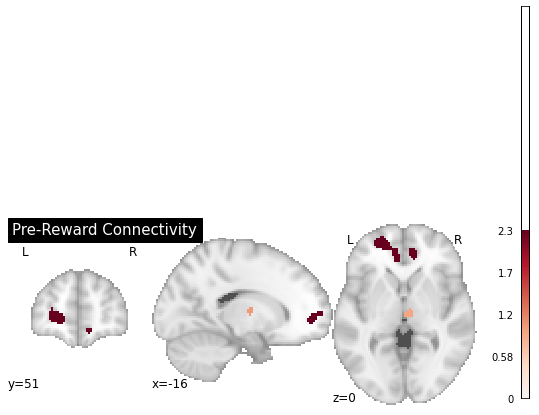

,1,2,3,4
Cluster ID,,,,
Center of Mass,"(33, -21, 7)","(25, -36, 62)","(-14, 9, 0)","(-22, -59, 52)"
Park_ 2010-VS- Learning t-value,0,0,0.177327,0.000834569
Reference= MNI Cao 2019-VS- learning tscore,0.677549,0.248077,0.309851,0.153976
Reference= MNI Chan 2018-VS- consumption tstat,2.22707e-05,0,0,0
Reference= MNI Chan 2018; Nacc-consumption tstat-,0,0,0,0
Reference= MNI Duijvenvoorde;left VS-Learning Z-,0,0.273397,0,0.18116
Reference= MNI Duijvenvoorde;right VS-Learning Z-,0.0017021,2.4774e-07,0,0.174617
Reference= MNI Fouragnan 2013-Caud- learning tstat,0,0,0,0
Reference= MNI Holst 2014-VS- Consumption ZSCORE,0.00626291,0,0,0


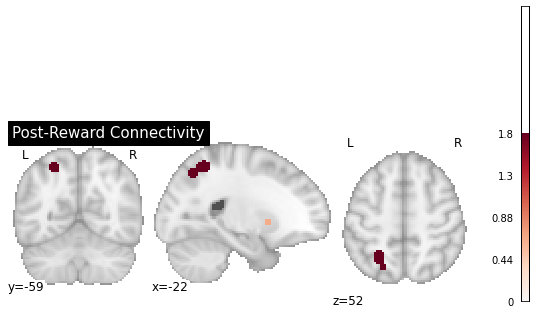

In [15]:
from nimare.diagnostics import Jackknife

jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
related_jackknife_table, _ = jackknife.transform(pre_corr)
display(related_jackknife_table)

pre_img = pre_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(pre_img,title="Pre-Reward Connectivity",cmap="RdBu_r",draw_cross=False)

plt.show()

related_jackknife_table, _ = jackknife.transform(post_corr)
display(related_jackknife_table)

post_img = post_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(post_img,title="Post-Reward Connectivity",cmap="RdBu_r",draw_cross=False)
plt.show()

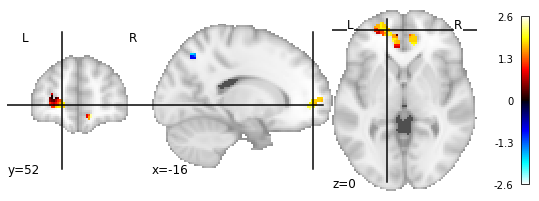

In [16]:
#https://neurostars.org/t/sanity-check-nimare-analysis-ale/17828/16
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(pre_dset, post_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =pre_img
img2 = post_img

# Threshold and binarize the ALE maps
from nilearn import image
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)

plot_stat_map(img_sub)
plt.show()

AttributeError: MetaResult was not generated by an Estimator with a `dataset` attribute. This may be because the Estimator was a pairwise Estimator. The Jackknife method does not currently work with pairwise Estimators.

In [17]:
pre_img.to_filename('STR_PreReward.nii.gz')
post_img.to_filename('STR_PostReward.nii.gz')
img_sub.to_filename('STR_Pre>Post.nii.gz')

## Results
1. Striatal -> mPFC + dlPFC connectivity is enhanced by pre>post reward receipt
2. Striatal -> Precuneus connecitivity is enhanced by post>pre reward receipt

In [ ]:
plotting.view_img(img_sub,title="RDC of Striatum Pre > Post",draw_cross=False)
img_sub.to

## Decision vs non-decision

In [36]:
dec_file="NIMARE_OUTPUT/STR_dec.txt"
dec_dset=convert_sleuth_to_dataset(dec_file)

non_file="NIMARE_OUTPUT/STR_nodec.txt"
non_dset=convert_sleuth_to_dataset(non_file)


dec_res = ale.fit(dec_dset)
non_res = ale.fit(non_dset)


dec_corr = corr.transform(dec_res)
non_corr = corr.transform(non_res)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


,1,2
Cluster ID,,
Center of Mass,"(36, -17, -3)","(-22, -60, 51)"
Park_ 2010-VS- Learning t-value,0,0.000703743
Reference= MNI Cao 2019-VS- learning tscore,0.276437,0.172386
Reference= MNI Deikof 2012-NACC-valuation tscore,0,0
Reference= MNI DiFeliceantonio 2018-Valuation,0.144473,0
Reference= MNI Diekhof 2010-Valuation,0,0
Reference= MNI Duijvenvoorde;left VS-Learning Z-,0,0.21172
Reference= MNI Duijvenvoorde;right VS-Learning Z-,0.215753,0.21161
Reference= MNI Enax_2015-vmpfc-ACC_Valuation-tstats,0,0


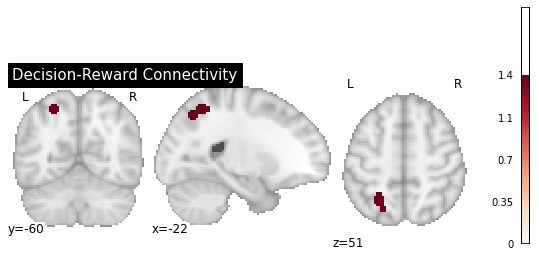

,1,2,3,4,5,6
Cluster ID,,,,,,
Center of Mass,"(8, 43, -6)","(0, -16, -5)","(-7, 42, -1)","(-16, 9, 0)","(-26, -90, -10)","(-52, -8, 32)"
Cubillo 2019 Anticipation t-value-,9.49351e-10,7.68543e-06,9.62563e-06,1.89628e-05,1.94698e-06,0.220554
Reference= MNI Bolstad 2013-L_VS- anticipation,0,0,0.000274358,0,0,0
Reference= MNI Bossong 2018-VS-anticipation tscore,0,0.000212769,0,0,0.122186,0
Reference= MNI Cao 2019-VS- anticipation tscore,0.541038,0.440008,0.248954,0.559315,0.436008,0.557777
Reference= MNI Chan 2018-VS- anticipation tstat,0.224356,0.276302,0.315709,0,0,0
Reference= MNI Chan 2018-VS- consumption tstat,0,0.000380182,0,0,0,0
Reference= MNI Chan 2018; Nacc-anticipation tstat-,0.225995,0.278429,0.318681,0,0,0
Reference= MNI Chan 2018; Nacc-consumption tstat-,0,0,0,1.21022e-06,0,0


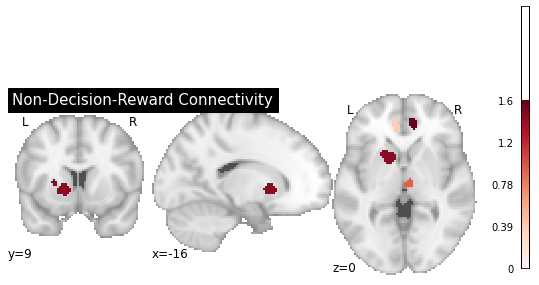

In [37]:
from nimare.diagnostics import Jackknife

jackknife = Jackknife(
    target_image="z_desc-size_level-cluster_corr-FWE_method-montecarlo",
    voxel_thresh=None,
)
related_jackknife_table, _ = jackknife.transform(dec_corr)
display(related_jackknife_table)

dec_img = dec_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(dec_img,title="Decision-Reward Connectivity",cmap="RdBu_r",draw_cross=False)

plt.show()

related_jackknife_table, _ = jackknife.transform(non_corr)
display(related_jackknife_table)

non_img = non_corr.get_map( "z_desc-size_level-cluster_corr-FWE_method-montecarlo")
plot_stat_map(non_img,title="Non-Decision-Reward Connectivity",cmap="RdBu_r",draw_cross=False)
plt.show()

/home/strange/.local/lib/python3.7/site-packages/nilearn/plotting/find_cuts.py:68: UserWarning: Given img is empty. Returning default cut_coords=(0.0, 0.0, 0.0) instead.
  .format(DEFAULT_CUT_COORDS))
/home/strange/.local/lib/python3.7/site-packages/nilearn/plotting/displays.py:880: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


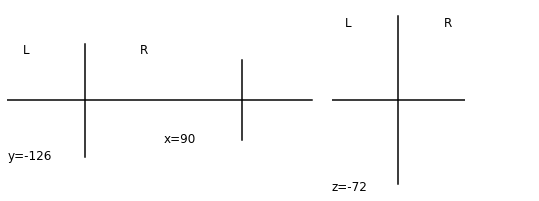

In [38]:
#https://neurostars.org/t/sanity-check-nimare-analysis-ale/17828/16
sub = ALESubtraction(n_iters=100, n_cores=4)
res_sub = sub.fit(dec_dset, non_dset)

img_sub = res_sub.get_map("z_desc-group1MinusGroup2")
img1 =dec_img
img2 = non_img

# Threshold and binarize the ALE maps
from nilearn import image
img1_bin = image.math_img("img > 1.65", img=img1)
img2_bin = image.math_img("img > 1.65", img=img2)

# Limit subtraction to significant voxels from original meta-analyses
# NOTE: This is a simplification by combining the two comparisons, but I think it's fine.

# Create combined ALE mask
import numpy as np
ale_mask = image.math_img("np.maximum(img1, img2)", img1=img1_bin, img2=img2_bin)

# Now limit those 
img_sub = image.math_img("subtraction * mask", subtraction=img_sub, mask=ale_mask)

plot_stat_map(img_sub)
plt.show()


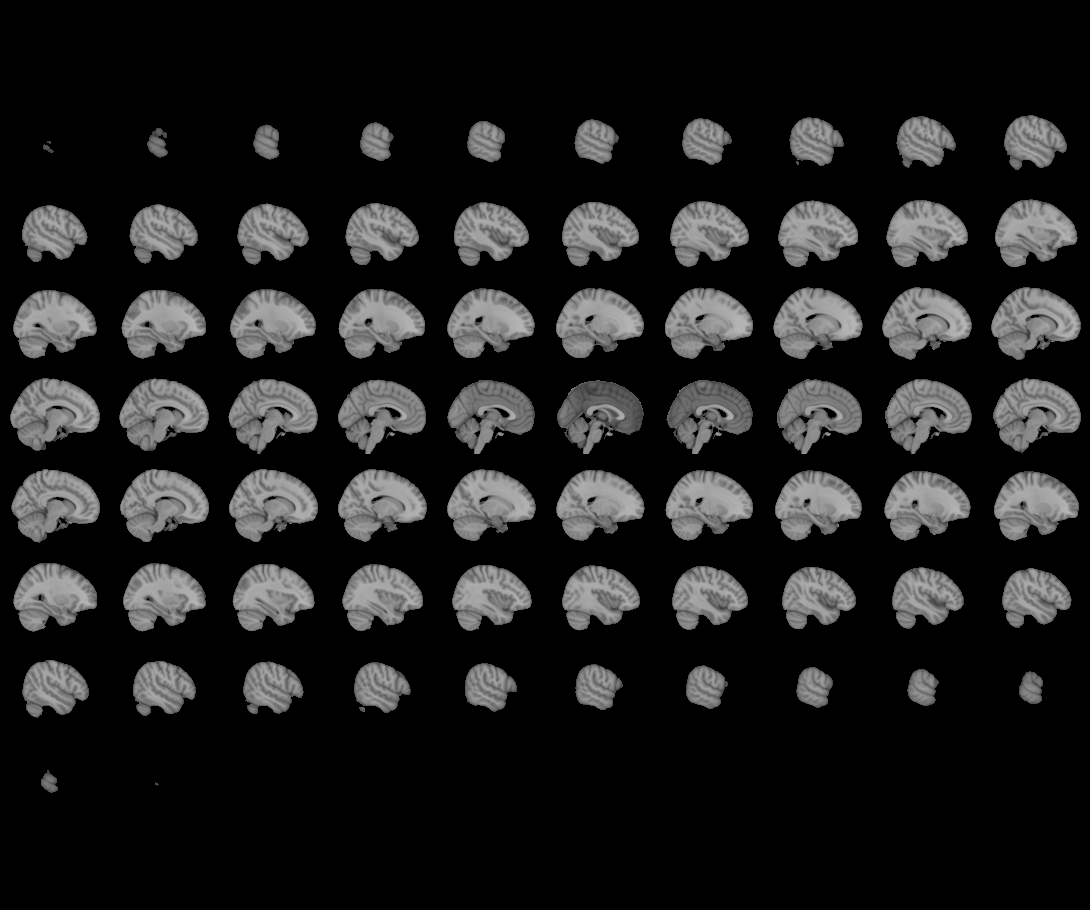
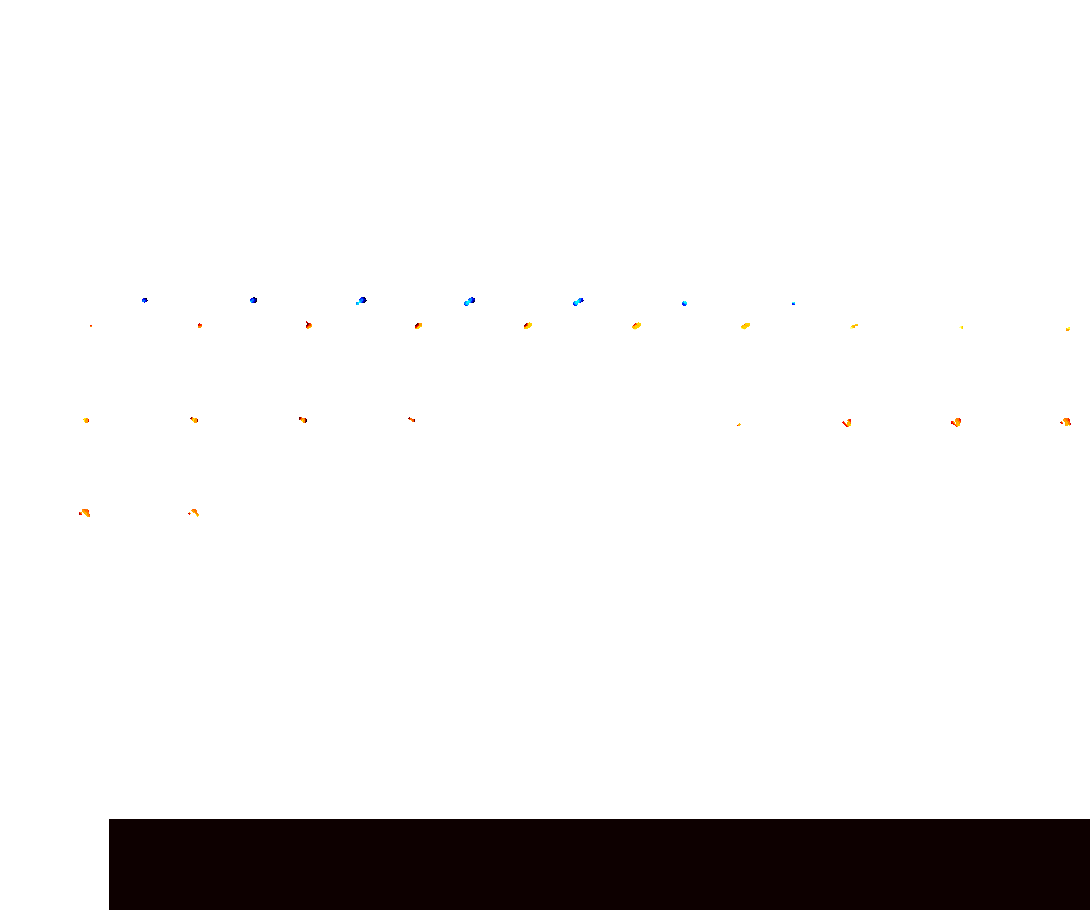

In [34]:
plotting.view_img(img_sub)